## Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

## Read data

In [2]:
dftr = pd.read_csv('train.csv')
dfts = pd.read_csv('test.csv')

In [3]:
final_df = dfts.copy()

In [4]:
dftr.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dfts.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Pre-Process data

In [6]:
dftr.shape

(891, 12)

In [7]:
dfts.shape

(418, 11)

In [8]:
dftr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
dfts.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
dftr.drop(columns='Cabin', inplace= True)
dftr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
dfts.drop(columns='Cabin', inplace= True)
dfts.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [12]:
# fill missing values using mean of the numerical column
dftr['Age'] = dftr['Age'].fillna(dftr['Age'].mean())

In [13]:
# fill missing values using mean of the numerical column
dfts['Age'] = dfts['Age'].fillna(dfts['Age'].mean())

In [14]:
dftr.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
dfts.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [16]:
dftr['Embarked'] = dftr['Embarked'].fillna(dftr['Embarked'].mode()[0])

In [17]:
dftr.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
dfts['Fare'] = dfts['Fare'].fillna(dfts['Fare'].mean())

In [19]:
dfts.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## EDA

In [20]:
dftr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [21]:
dftr['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


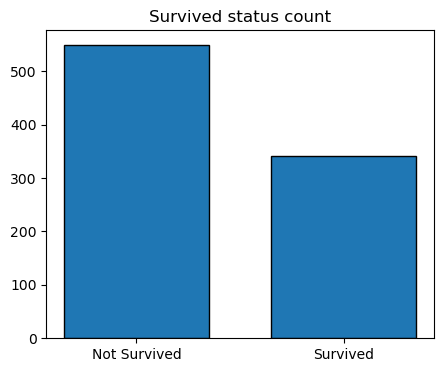

In [22]:
survived = dftr['Survived'].value_counts(normalize = True)
print(survived)

plt.figure(figsize = (5,4))
plt.title('Survived status count')
plt.bar(['Not Survived','Survived'], dftr['Survived'].value_counts(), edgecolor = 'k',width = 0.7)
plt.show()

In [23]:
dftr['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


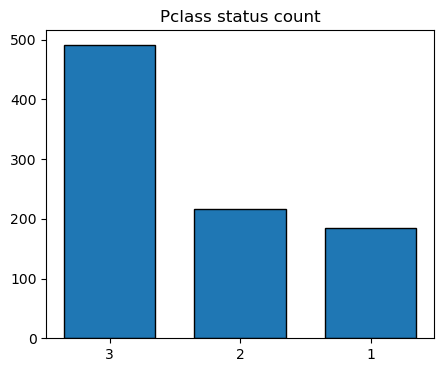

In [24]:
pclass = dftr['Pclass'].value_counts(normalize = True)
print(pclass)

plt.figure(figsize = (5,4))
plt.title('Pclass status count')
plt.bar(['3','2','1'], dftr['Pclass'].value_counts(), edgecolor = 'k',width = 0.7)
plt.show()

In [25]:
dftr['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


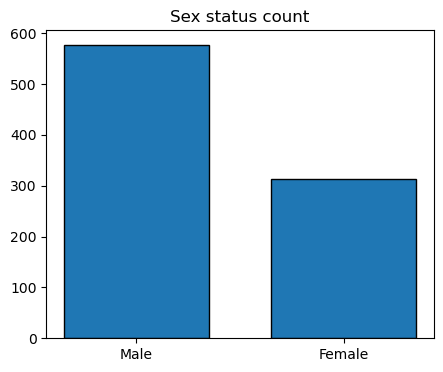

In [26]:
pclass = dftr['Sex'].value_counts(normalize = True)
print(pclass)

plt.figure(figsize = (5,4))
plt.title('Sex status count')
plt.bar(['Male','Female'], dftr['Sex'].value_counts(), edgecolor = 'k',width = 0.7)
plt.show()

In [27]:
dftr['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

SibSp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: proportion, dtype: float64


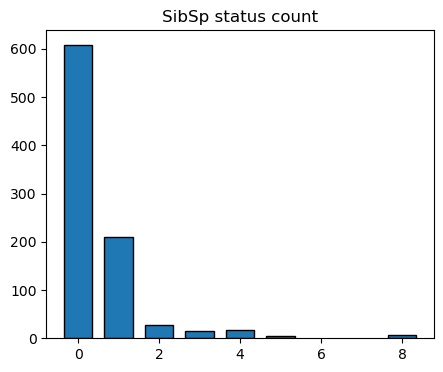

In [28]:
pclass = dftr['SibSp'].value_counts(normalize = True)
print(pclass)

plt.figure(figsize = (5,4))
plt.title('SibSp status count')
plt.bar([0,1,2,4,3,8,5], dftr['SibSp'].value_counts(), edgecolor = 'k',width = 0.7)
plt.show()

In [29]:
dftr['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Parch
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: proportion, dtype: float64


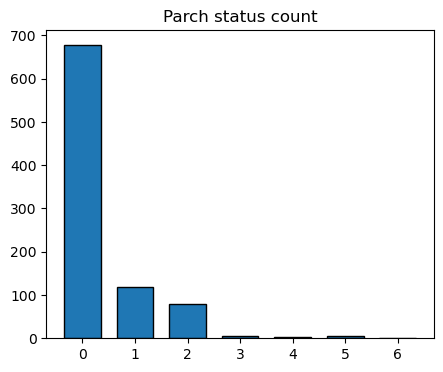

In [30]:
pclass = dftr['Parch'].value_counts(normalize = True)
print(pclass)

plt.figure(figsize = (5,4))
plt.title('Parch status count')
plt.bar([0,1,2,5,3,4,6], dftr['Parch'].value_counts(), edgecolor = 'k',width = 0.7)
plt.show()

In [31]:
dftr['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Embarked
S    0.725028
C    0.188552
Q    0.086420
Name: proportion, dtype: float64


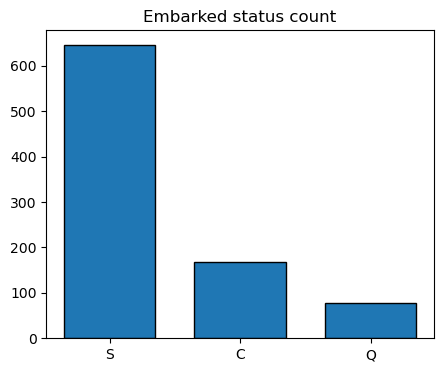

In [32]:
pclass = dftr['Embarked'].value_counts(normalize = True)
print(pclass)

plt.figure(figsize = (5,4))
plt.title('Embarked status count')
plt.bar(['S','C','Q'], dftr['Embarked'].value_counts(), edgecolor = 'k',width = 0.7)
plt.show()

In [33]:
dftr.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [34]:
dftr['Fare'] = np.log(dftr['Fare']+1)
dfts['Fare'] = np.log(dfts['Fare']+1)

In [35]:
dftr = dftr.drop(columns=['Ticket'], axis=1)
dfts = dfts.drop(columns=['Ticket'], axis=1)

In [36]:
dftr.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,2.110213,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.280593,C


In [37]:
dfts.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,2.178064,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,2.079442,S


In [38]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    dftr[col] = le.fit_transform(dftr[col])
    dfts[col] = le.fit_transform(dfts[col])

In [39]:
dftr.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2.110213,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,4.280593,0


In [40]:
dfts.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,2.178064,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,2.079442,2


In [41]:
dftr['Title'], dfts['Title'] = [df.Name.str.extract (' ([A-Za-z]+)\.', expand=False) for df in [dftr, dfts]]

In [42]:
dftr['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [43]:
dfts['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [44]:
dftr['Title'] = dftr["Title"].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

dftr['Title'] = dftr['Title'].replace('Mlle', 'Miss')
dftr['Title'] = dftr['Title'].replace('Ms', 'Miss')
dftr['Title'] = dftr['Title'].replace('Mme', 'Mrs')
    
dftr[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [45]:
dfts['Title'] = dfts["Title"].replace(['Col','Dr','Rev','Dona'], 'Rare')

dfts['Title'] = dfts['Title'].replace('Ms', 'Miss')

In [46]:
cols = ['Title']
le = LabelEncoder()

dftr[col] = le.fit_transform(dftr[col])
dfts[col] = le.fit_transform(dfts[col])

In [47]:
dftr.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2.110213,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,4.280593,0,Mrs


In [48]:
dftr['AgeBand'] = pd.cut(dftr['Age'], 5)
dftr[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_15224\2534490955.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dftr[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [49]:
# for dataset in combine:    
dftr.loc[ dftr['Age'] <= 16, 'Age'] = 0
dftr.loc[(dftr['Age'] > 16) & (dftr['Age'] <= 32), 'Age'] = 1
dftr.loc[(dftr['Age'] > 32) & (dftr['Age'] <= 48), 'Age'] = 2
dftr.loc[(dftr['Age'] > 48) & (dftr['Age'] <= 64), 'Age'] = 3
dftr.loc[ dftr['Age'] > 64, 'Age']

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

In [50]:
dftr.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,2.110213,2,Mr,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,4.280593,0,Mrs,"(32.252, 48.168]"


In [51]:
# for dataset in combine:    
dfts.loc[ dfts['Age'] <= 16, 'Age'] = 0
dfts.loc[(dfts['Age'] > 16) & (dfts['Age'] <= 32), 'Age'] = 1
dfts.loc[(dfts['Age'] > 32) & (dfts['Age'] <= 48), 'Age'] = 2
dfts.loc[(dfts['Age'] > 48) & (dfts['Age'] <= 64), 'Age'] = 3
dfts.loc[ dfts['Age'] > 64, 'Age']

81    67.0
96    76.0
Name: Age, dtype: float64

In [52]:
dfts.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",1,2.0,0,0,2.178064,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,2.079442,2,Mrs


In [53]:
combine = [dftr, dfts]

In [54]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']

In [55]:
# dftr.loc[dftr['FamilySize'] == 0, 'FamilySize'] = 1
# dfts.loc[dftr['FamilySize'] == 0, 'FamilySize'] = 1
dftr['FamilySize'].replace({0:1}, inplace= True)

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_15224\2350277564.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftr['FamilySize'].replace({0:1}, inplace= True)


In [56]:
dfts['FamilySize'].replace({0:1}, inplace= True)

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_15224\3721935821.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfts['FamilySize'].replace({0:1}, inplace= True)


In [57]:
dftr[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
2,3,0.724138
1,2,0.578431
0,1,0.361032
5,6,0.333333
3,4,0.200000
4,5,0.136364
6,7,0.000000
7,10,0.000000


In [58]:
dftr['IsAlone'] = 0
dfts['IsAlone'] = 0

In [59]:
dftr.loc[dftr['FamilySize'] == 1, 'IsAlone'] = 1
dfts.loc[dfts['FamilySize'] == 1, 'IsAlone'] = 1

In [60]:
dftr[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.466321
1,1,0.361032


In [61]:
# dfts[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

In [62]:
dftr.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,2.110213,2,Mr,"(16.336, 32.252]",1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,4.280593,0,Mrs,"(32.252, 48.168]",1,1


In [63]:
dftr[dftr['FamilySize']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone


In [64]:
dfts[dfts['FamilySize']==0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone


In [65]:
# dfts.loc[dfts['FamilySize'] == 1, 'IsAlone'] = 1

In [66]:
dfts.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",1,2.0,0,0,2.178064,1,Mr,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,2.079442,2,Mrs,1,1


In [67]:
dftr['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [68]:
dftr['Title'].replace({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Rare':4}, inplace = True)
dfts['Title'].replace({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Rare':4}, inplace = True)

C:\Users\akshay.s\AppData\Local\Temp\ipykernel_15224\368844489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftr['Title'].replace({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Rare':4}, inplace = True)
C:\Users\akshay.s\AppData\Local\Temp\ipykernel_15224\368844489.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

In [69]:
dftr.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,2.110213,2,0,"(16.336, 32.252]",1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,4.280593,0,1,"(32.252, 48.168]",1,1


In [70]:
dfts.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",1,2.0,0,0,2.178064,1,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,2.079442,2,1,1,1


In [71]:
dftr['Fare_Per_Person'] = dftr['Fare'] / (dftr['FamilySize'])
dfts['Fare_Per_Person'] = dfts['Fare'] / (dfts['FamilySize'])

In [72]:
dftr.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,2.110213,2,0,"(16.336, 32.252]",1,1,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,4.280593,0,1,"(32.252, 48.168]",1,1,4.280593


In [73]:
dfts.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Fare_Per_Person
0,892,3,"Kelly, Mr. James",1,2.0,0,0,2.178064,1,0,1,1,2.178064
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,2.079442,2,1,1,1,2.079442


In [74]:
dftr[dftr['FamilySize'] == 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone,Fare_Per_Person
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,1.0,0,2,2.495954,2,1,"(16.336, 32.252]",2,0,1.247977
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,0.0,1,1,2.873565,2,2,"(0.34, 16.336]",2,0,1.436782
38,39,0,3,"Vander Planke, Miss. Augusta Maria",0,1.0,2,0,2.944439,2,2,"(16.336, 32.252]",2,0,1.472219
48,49,0,3,"Samaan, Mr. Youssef",1,1.0,2,0,3.121448,0,0,"(16.336, 32.252]",2,0,1.560724
65,66,1,3,"Moubarek, Master. Gerios",1,1.0,1,1,2.787834,0,3,"(16.336, 32.252]",2,0,1.393917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,853,0,3,"Boulos, Miss. Nourelain",0,0.0,1,1,2.787834,0,2,"(0.34, 16.336]",2,0,1.393917
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",0,2.0,1,1,5.111184,2,1,"(32.252, 48.168]",2,0,2.555592
860,861,0,3,"Hansen, Mr. Claus Peter",1,2.0,2,0,2.715244,2,0,"(32.252, 48.168]",2,0,1.357622
869,870,1,3,"Johnson, Master. Harold Theodor",1,0.0,1,1,2.495954,2,3,"(0.34, 16.336]",2,0,1.247977


In [75]:
dftr.drop(columns=['PassengerId', 'Name', 'Fare', 'AgeBand'], axis= 1, inplace= True)
dfts.drop(columns=['PassengerId', 'Name', 'Fare'], axis= 1, inplace= True)

## Data exploration

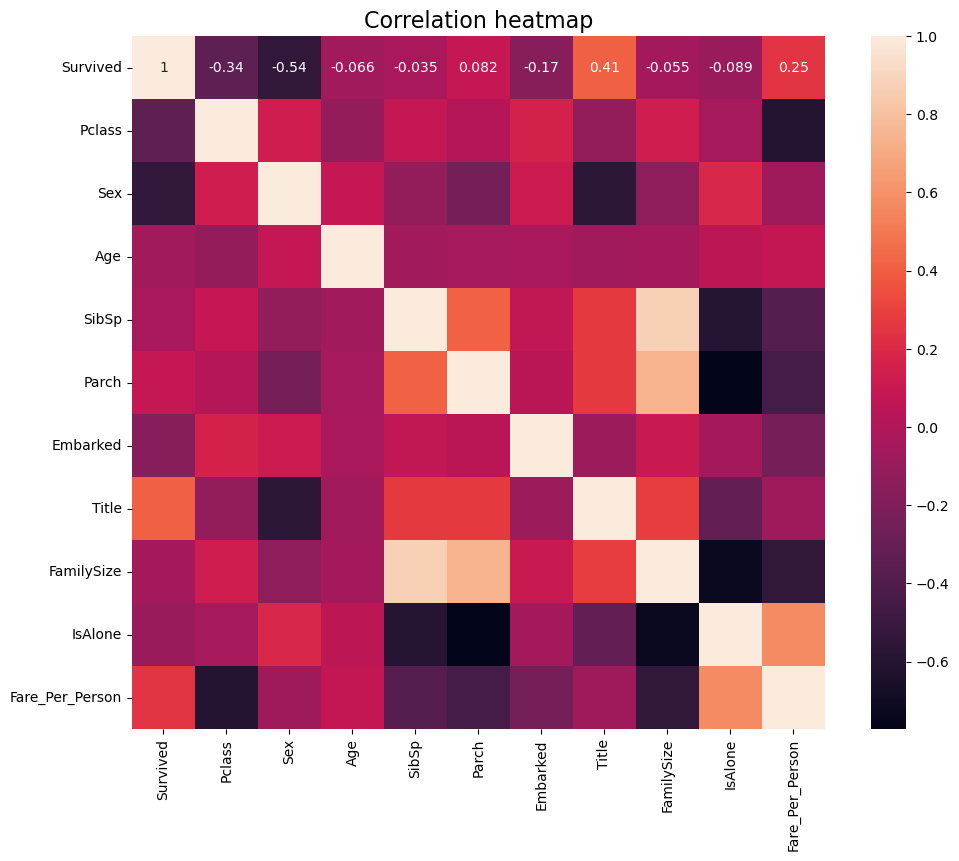

In [76]:
# calculate the correlation matrix
corr_mat = dftr.corr()

# create the heatmap plot using seaborn
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, annot=True, square=True)

plt.title("Correlation heatmap", size=16)

plt.show()

In [77]:
dftr.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FamilySize,IsAlone,Fare_Per_Person
Survived,1.000000,-0.338481,-0.543351,-0.065770,-0.035322,0.081629,-0.167675,0.405921,-0.054954,-0.089185,0.250132
Pclass,-0.338481,1.000000,0.131900,-0.112962,0.083081,0.018443,0.162098,-0.120491,0.130486,-0.043796,-0.601015
Sex,-0.543351,0.131900,1.000000,0.086111,-0.114631,-0.245489,0.108262,-0.564438,-0.132703,0.188116,-0.071388
Age,-0.065770,-0.112962,0.086111,1.000000,-0.065076,-0.041678,-0.034282,-0.062396,-0.056850,0.055009,0.074522
SibSp,-0.035322,0.083081,-0.114631,-0.065076,1.000000,0.414838,0.068230,0.269474,0.869709,-0.598391,-0.375606
Parch,0.081629,0.018443,-0.245489,-0.041678,0.414838,1.000000,0.039798,0.267818,0.738920,-0.772284,-0.449730
Embarked,-0.167675,0.162098,0.108262,-0.034282,0.068230,0.039798,1.000000,-0.082845,0.104600,-0.049803,-0.244547
Title,0.405921,-0.120491,-0.564438,-0.062396,0.269474,0.267818,-0.082845,1.000000,0.280641,-0.318158,-0.075357
FamilySize,-0.054954,0.130486,-0.132703,-0.056850,0.869709,0.738920,0.104600,0.280641,1.000000,-0.729402,-0.540539
IsAlone,-0.089185,-0.043796,0.188116,0.055009,-0.598391,-0.772284,-0.049803,-0.318158,-0.729402,1.000000,0.571890


In [78]:
dftr.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FamilySize,IsAlone,Fare_Per_Person
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,2.102694,0.523008,0.381594,1.536476,0.794613,1.507295,0.783389,2.476396
std,0.486592,0.836071,0.477990,7.622841,1.102743,0.806057,0.791503,1.076519,1.323386,0.412166,1.078196
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.107178
50%,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.202765
75%,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,3.091042
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000,4.000000,10.000000,1.000000,6.240917


In [79]:
dftr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FamilySize,IsAlone,Fare_Per_Person
0,0,3,1,1.0,1,0,2,0,1,1,2.110213
1,1,1,0,2.0,1,0,0,1,1,1,4.280593
2,1,3,0,1.0,0,0,2,2,1,1,2.188856
3,1,1,0,2.0,1,0,2,1,1,1,3.990834
4,0,3,1,2.0,0,0,2,0,1,1,2.202765


In [80]:
dfts.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FamilySize,IsAlone,Fare_Per_Person
0,3,1,2.0,0,0,1,0,1,1,2.178064
1,3,0,2.0,1,0,2,1,1,1,2.079442
2,2,1,3.0,0,0,1,0,1,1,2.369075
3,3,1,1.0,0,0,2,0,1,1,2.268252
4,3,0,1.0,1,1,2,1,2,0,1.293412


In [81]:
X = dftr.drop(columns= ['Survived','Fare_Per_Person'], axis= 1)
y = dftr['Survived']

In [82]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [83]:
scalar = StandardScaler()
scalar.fit(X)
standardized_data = scalar.transform(X)
print(standardized_data)

[[ 0.82737724  0.73769513 -0.14473776 ... -0.73854653 -0.38354644
   0.52583676]
 [-1.56610693 -1.35557354 -0.01347939 ...  0.1908955  -0.38354644
   0.52583676]
 [ 0.82737724 -1.35557354 -0.14473776 ...  1.12033754 -0.38354644
   0.52583676]
 ...
 [ 0.82737724 -1.35557354 -0.14473776 ...  1.12033754  1.12857691
  -1.90173087]
 [-1.56610693  0.73769513 -0.14473776 ... -0.73854653 -0.38354644
   0.52583676]
 [ 0.82737724  0.73769513 -0.14473776 ... -0.73854653 -0.38354644
   0.52583676]]


In [84]:
scalar = StandardScaler()
scalar.fit(dfts)
standardized_data1 = scalar.transform(dfts)
print(standardized_data1)

[[ 0.87348191  0.75592895  0.07599953 ... -0.36039203  0.52752958
  -0.35241723]
 [ 0.87348191 -1.32287566  0.07599953 ... -0.36039203  0.52752958
  -0.44670347]
 [-0.31581919  0.75592895  0.27963931 ... -0.36039203  0.52752958
  -0.16980589]
 ...
 [ 0.87348191  0.75592895  0.07599953 ... -0.36039203  0.52752958
  -0.4172849 ]
 [ 0.87348191  0.75592895 -0.12764024 ... -0.36039203  0.52752958
  -0.328803  ]
 [ 0.87348191  0.75592895 -0.12764024 ...  0.44952124 -1.89562828
  -0.92850853]]


## Model Build

In [86]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
lr = LogisticRegression()
lr.fit(X, y)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8379888268156425
Confusion Matrix : 
[[101  11]
 [ 18  49]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       112
           1       0.82      0.73      0.77        67

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [88]:
rd_clf = RandomForestClassifier(oob_score = True)
rd_clf.fit(X, y)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8212290502793296
Confusion Matrix : 
[[103   9]
 [ 23  44]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       112
           1       0.83      0.66      0.73        67

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### FFNN Model Architecture

In [90]:
X.shape

(712, 9)

In [91]:
ffnn_model = Sequential()
ffnn_model.add(Dense(input_shape = (9,), units = 50, activation = 'relu'))
ffnn_model.add(Dense(units = 15, activation = 'relu'))
ffnn_model.add(Dense(units = 30, activation = 'relu'))
ffnn_model.add(Dense(units = 15, activation = 'relu'))
ffnn_model.add(Dense(units = 1, activation = 'sigmoid'))

C:\Users\akshay.s\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Observing layer wise details¶

In [92]:
ffnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             765 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,226 (8.70 KB)

 Trainable params: 2,226 (8.70 KB)

 Non-trainable params: 0 (0.00 B)

#### Setting up the Optimizer and the Loss Function

In [93]:
from tensorflow import keras

In [94]:
ffnn_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#### Training the model

In [95]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.05)

In [96]:
ffnn_model.fit(X_train, y_train, batch_size=8, epochs=100, validation_data = (X_valid,y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6104 - loss: 0.6532 - val_accuracy: 0.5278 - val_loss: 0.6603
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5879 - loss: 0.6552 - val_accuracy: 0.5278 - val_loss: 0.6561
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6265 - loss: 0.6415 - val_accuracy: 0.5278 - val_loss: 0.6547
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6060 - loss: 0.6425 - val_accuracy: 0.5278 - val_loss: 0.6532
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5894 - loss: 0.6449 - val_accuracy: 0.5278 - val_loss: 0.6518
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6131 - loss: 0.6285 - val_accuracy: 0.5278 - val_loss: 0.6502
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6239 - loss: 0.6231 - val_accuracy: 0.5278 - val_loss: 0.6486
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6038 - loss: 0.6201 - val_accuracy: 0.5278 - v

#### Evaluating Model Performance on Test dataset

In [97]:
model_acc = ffnn_model.evaluate(X_test, y_test)
print(" Model Accuracy is : {0:.1f}%".format(model_acc[1]*100))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8586 - loss: 0.4404 
 Model Accuracy is : 86.6%


## Predict

#### Making prediction using the model

In [98]:
x_test_pred = ffnn_model.predict(X_test)
x_test_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.3457187 ],
       [0.15973501],
       [0.11027685],
       [0.42610255],
       [0.620236  ],
       [0.620236  ],
       [0.0893035 ],
       [0.7579336 ],
       [0.15145937],
       [0.71801615],
       [0.09367623],
       [0.54725724],
       [0.7669661 ],
       [0.20623705],
       [0.6895044 ],
       [0.23803249],
       [0.09367623],
       [0.73735595],
       [0.26666427],
       [0.60617113],
       [0.71650565],
       [0.77850866],
       [0.09367623],
       [0.38424802],
       [0.09367623],
       [0.26666427],
       [0.09367623],
       [0.09367623],
       [0.09367623],
       [0.17990896],
       [0.09367628],
       [0.10818974],
       [0.18561067],
       [0.26666427],
       [0.34088278],
       [0.15973501],
       [0.7669661 ],
       [0.15973501],
       [0.09367623],
       [0.21843359],
       [0.40194187],
       [0.5679174 ],
       [0.18214217],
       [0.69347155],
       [0.09723848],
       [0.09367623],
       [0.3769734 ],
       [0.408

In [99]:
x_test_prediction = []

for idx, i in enumerate(x_test_pred):
    if i > 0.5:
        x_test_prediction.append(1)
    else:
        x_test_prediction.append(0)
        
x_test_prediction

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0]

In [100]:
xTest = pd.Series(x_test_prediction)

In [101]:
acc_rd_clf = accuracy_score(y_test, xTest)
conf = confusion_matrix(y_test, xTest)
clf_report = classification_report(y_test, xTest)

print(f"Accuracy Score of is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of is : 0.8659217877094972
Confusion Matrix : 
[[104   8]
 [ 16  51]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       112
           1       0.86      0.76      0.81        67

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179



In [102]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,x_test_prediction))
print ("MSE:",metrics.mean_squared_error(y_test,x_test_prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,x_test_prediction)))

MAE: 0.1340782122905028
MSE: 0.1340782122905028
RMSE: 0.36616691861841205


In [103]:
dfts = dfts.drop(columns= ['Fare_Per_Person'], axis= 1)

In [104]:
x_ts_pred = ffnn_model.predict(dfts)
x_ts_pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.11456086],
       [0.42610255],
       [0.25150877],
       [0.09367623],
       [0.40848428],
       [0.0893035 ],
       [0.72239363],
       [0.1397289 ],
       [0.5656533 ],
       [0.0876095 ],
       [0.09367623],
       [0.34088278],
       [0.7579336 ],
       [0.25349492],
       [0.7883477 ],
       [0.69727707],
       [0.20518076],
       [0.15145937],
       [0.6561276 ],
       [0.50289655],
       [0.56232214],
       [0.6859354 ],
       [0.7487349 ],
       [0.3632382 ],
       [0.6853873 ],
       [0.12163037],
       [0.7155725 ],
       [0.15145937],
       [0.34088278],
       [0.19895336],
       [0.25349492],
       [0.13688812],
       [0.4401059 ],
       [0.41671672],
       [0.520695  ],
       [0.15145937],
       [0.63299304],
       [0.63299304],
       [0.09367623],
       [0.09367623],
       [0.13705233],
       [0.26666427],
       [0.09739123],
       [0.58628845],
       [0.7883477 ],
       [0.09367623],
       [0.43601573],
       [0.110

In [105]:
x_ts_prediction = []

for idx, i in enumerate(x_ts_pred):
    if i > 0.5:
        x_ts_prediction.append(1)
    else:
        x_ts_prediction.append(0)
        
x_ts_prediction

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,


In [106]:
xTest = pd.Series(x_ts_prediction)

In [107]:
final_df.shape

(418, 11)

In [108]:
xTest.shape

(418,)

In [109]:
final_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [110]:
xTest.head(2)

0    0
1    0
dtype: int64

In [111]:
df = pd.concat([final_df, xTest], axis=1)

In [112]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


## Got final accuracy 86.6% by ANN